In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [15]:
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')

In [5]:
train_df.head(10)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,...,0,0,0,0,0,0,0,0,0,1
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,...,0,0,0,0,0,0,0,0,0,1
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,...,0,0,0,0,0,0,0,0,0,1
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,...,0,1,0,1,0,1,2,0,1,1
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,...,0,0,1,1,1,1,1,2,2,1


In [6]:
train_df.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [7]:
test_df.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
dtype: int64

In [8]:
train_df.describe(include='all')

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058,116058,116058.000000,1.160580e+05,116058.000000,116058,116058,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
unique,NaN,3,19,NaN,NaN,NaN,3,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,X,OTHER,NaN,NaN,NaN,2012-02-01,04/2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,63858,49699,NaN,NaN,NaN,52334,52840,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.494155e+11,NaN,NaN,3.868961,2.082262e+05,292.280997,NaN,NaN,67.431939,1.593186,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,NaN,NaN,0.461020,1.146851e+05,89.762415,NaN,NaN,17.291719,0.491242,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,NaN,NaN,2.250000,1.100000e+04,60.000000,NaN,NaN,6.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,NaN,NaN,3.500000,1.200000e+05,180.000000,NaN,NaN,57.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,NaN,NaN,3.875000,1.830000e+05,360.000000,NaN,NaN,72.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,NaN,NaN,4.125000,2.780000e+05,360.000000,NaN,NaN,80.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
test_df.describe(include='all')

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
count,35866.000000,35866,35866,35866.000000,35866.000000,35866.000000,35866,35866,35866.000000,35866.000000,...,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000
unique,NaN,3,19,NaN,NaN,NaN,3,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,X,OTHER,NaN,NaN,NaN,01/02/12,Apr-12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,19714,15162,NaN,NaN,NaN,16423,16551,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,17933.500000,NaN,NaN,3.872850,207764.846930,293.130123,NaN,NaN,67.388334,1.596805,...,0.001952,0.002007,0.002705,0.002370,0.003374,0.003680,0.004322,0.005548,0.006162,0.007333
std,10353.766714,NaN,NaN,0.460537,114561.745828,89.298799,NaN,NaN,17.246741,0.490546,...,0.056838,0.059238,0.071770,0.066958,0.086539,0.092898,0.099676,0.121322,0.141455,0.160602
min,1.000000,NaN,NaN,2.375000,15000.000000,60.000000,NaN,NaN,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8967.250000,NaN,NaN,3.500000,119000.000000,180.000000,NaN,NaN,57.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17933.500000,NaN,NaN,3.875000,182000.000000,360.000000,NaN,NaN,72.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26899.750000,NaN,NaN,4.125000,278000.000000,360.000000,NaN,NaN,80.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
train_df.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [16]:
train_data = train_df.drop('loan_id',axis=1)
test_data  = test_df.drop('loan_id',axis=1)

In [17]:
print(train_data.shape,test_data.shape)

(116058, 28) (35866, 27)


In [19]:
for col in train_data.columns:
    print(train_data[col].nunique(),col)

3 source
19 financial_institution
923 interest_rate
646 unpaid_principal_bal
140 loan_term
3 origination_date
4 first_payment_date
92 loan_to_value
2 number_of_borrowers
58 debt_to_income_ratio
221 borrower_credit_score
3 loan_purpose
14 insurance_percent
216 co-borrower_credit_score
2 insurance_type
4 m1
5 m2
6 m3
7 m4
8 m5
9 m6
10 m7
10 m8
11 m9
12 m10
13 m11
13 m12
2 m13


In [20]:
train_data['source'].value_counts()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [21]:
train_data['source'].value_counts().index.values

array(['X', 'Y', 'Z'], dtype=object)

In [22]:
def plot_bar(column,title,figsize=(5,5)):
    param = column.value_counts().index.values
    count = column.value_counts().values
    fig = plt.figure(figsize=figsize)
    if column.dtype == 'object':
        fig = sns.barplot(count,param)
        for i,cnt in enumerate(count):
            fig.text(cnt,i,'  '+str(cnt)+' , '+str(round(cnt/len(column)*100,2))+' %',fontsize=10) 
    else:
        fig = sns.barplot(param,count)
        for i,cnt in enumerate(count):
            fig.text(i,cnt,'  '+str(cnt)+' , '+str(round(cnt/len(column)*100,2))+' %',fontsize=10) 
    fig.set_xlabel('Counts')
    fig.set_ylabel(column.name)
    fig.set_title('Distribution of ' +title)

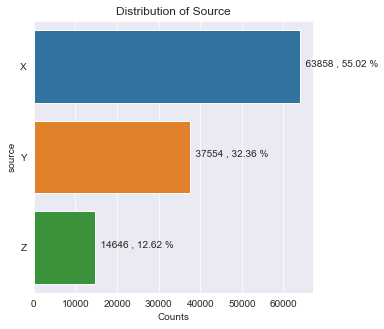

In [23]:
plot_bar(train_data['source'],'Source')

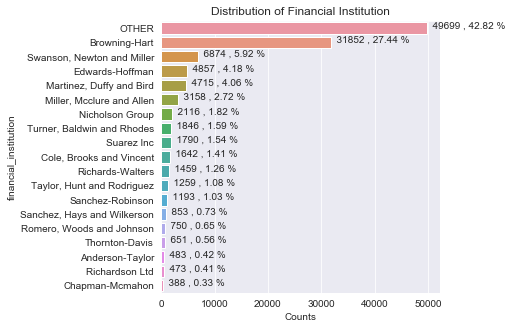

In [24]:
plot_bar(train_data['financial_institution'], 'Financial Institution')

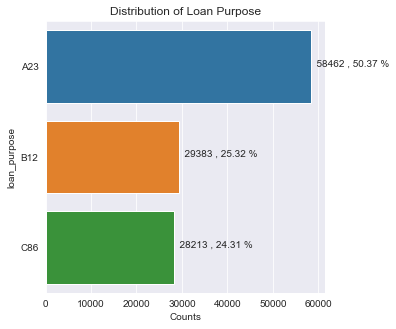

In [25]:
plot_bar(train_data['loan_purpose'],'Loan Purpose')

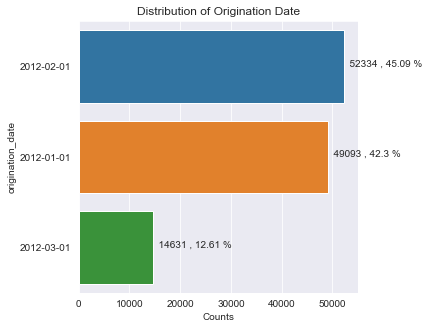

In [26]:
plot_bar(train_data['origination_date'],'Origination Date')

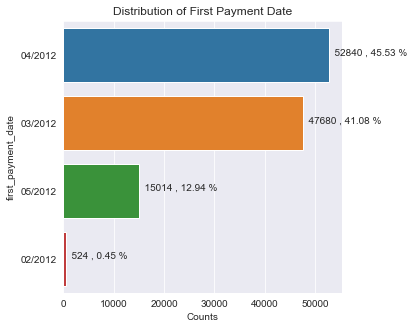

In [27]:
plot_bar(train_data['first_payment_date'],'First Payment Date')

In [28]:
train_data['m13'].value_counts().values

array([115422,    636], dtype=int64)

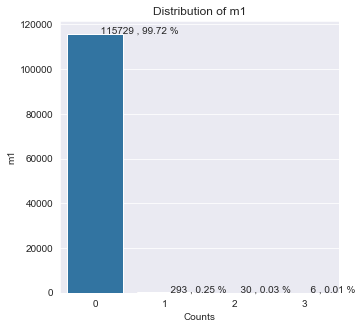

In [29]:
plot_bar(train_data['m1'],'m1')

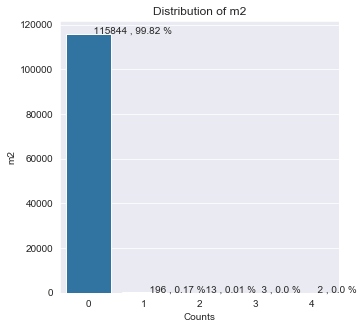

In [30]:
plot_bar(train_data['m2'],'m2')

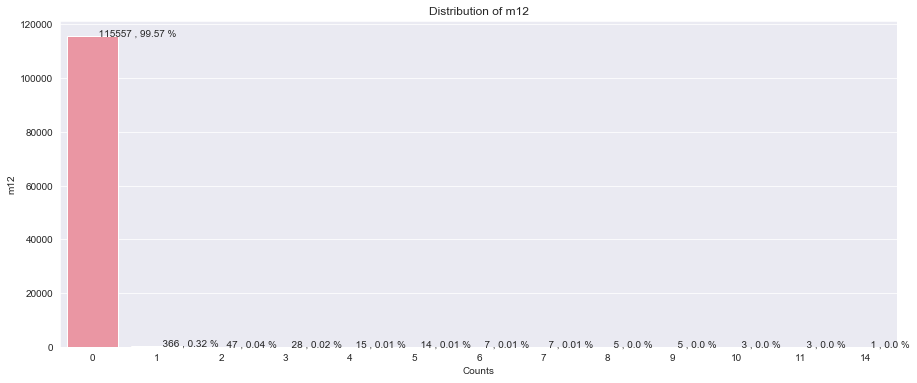

In [31]:
plot_bar(train_data['m12'],'m12',(15,6))

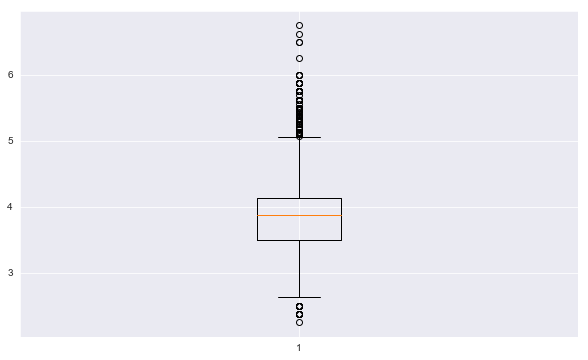

In [32]:
plt.figure(figsize=(10,6))
plt.boxplot(train_data['interest_rate'])
plt.show()

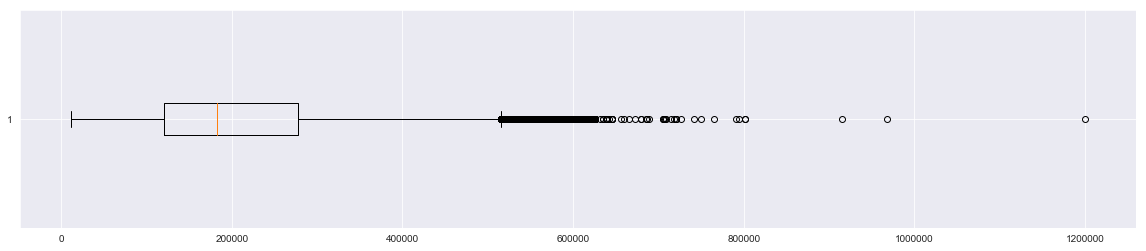

In [33]:
plt.figure(figsize=(20,4))
plt.boxplot(train_data['unpaid_principal_bal'],vert=False)
plt.show()

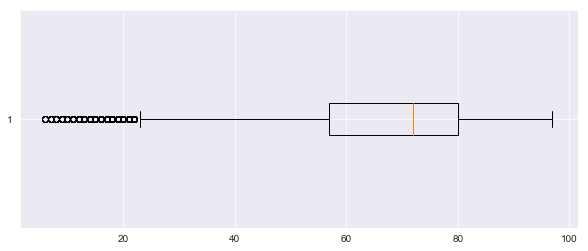

In [34]:
plt.figure(figsize=(10,4))
plt.boxplot(train_data['loan_to_value'],vert=False)
plt.show()

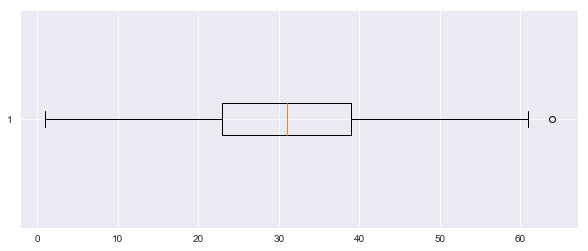

In [35]:
plt.figure(figsize=(10,4))
plt.boxplot(train_data['debt_to_income_ratio'],vert=False)
plt.show()

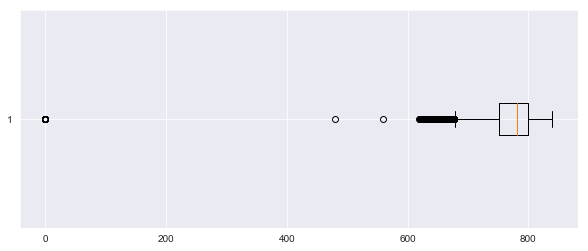

In [36]:
plt.figure(figsize=(10,4))
plt.boxplot(train_data['borrower_credit_score'],vert=False)
plt.show()

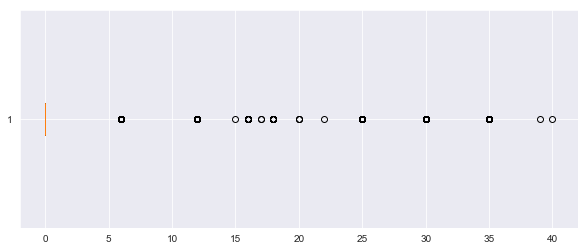

In [37]:
plt.figure(figsize=(10,4))
plt.boxplot(train_data['insurance_percent'],vert=False)
plt.show()

In [38]:
col_obj = ['source','financial_institution','origination_date','first_payment_date','loan_purpose']

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for x in col_obj:
    train_data[x] = encoder.fit_transform(train_data[x])
    test_data[x] = encoder.fit_transform(test_data[x])

In [40]:
train_data.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,2,18,4.250,214000,360,2,3,95,1.0,22.0,...,0,0,0,1,0,0,0,0,0,1
1,1,15,4.875,144000,360,0,1,72,1.0,44.0,...,0,0,0,0,0,0,0,1,0,1
2,2,17,3.250,366000,180,0,1,49,1.0,33.0,...,0,0,0,0,0,0,0,0,0,1
3,0,8,4.750,135000,360,1,2,46,2.0,44.0,...,0,0,0,0,0,1,1,1,1,1
4,0,8,4.750,124000,360,1,2,80,1.0,43.0,...,3,4,5,6,7,8,9,10,11,1


In [41]:
test_data.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,1,3.875,417000,360,1,0,75,1,20,...,0,0,0,0,0,0,0,0,0,0
1,0,8,4.500,113000,360,1,0,80,2,33,...,0,0,0,0,0,0,0,0,0,0
2,1,8,4.500,72000,360,0,2,75,1,34,...,0,0,0,0,0,0,0,0,0,0
3,0,6,4.125,123000,180,1,0,41,2,24,...,0,0,0,0,0,0,0,0,0,0
4,0,1,3.250,166000,180,1,0,53,2,12,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X = train_data.drop('m13',axis=1)
y = train_data['m13']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 101)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

C:\Users\SDS7695\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SDS7695\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\SDS7695\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [45]:
model_XGB = xgb.XGBClassifier(n_estimators=100,max_depth=8,min_child_weight=5,subsample=0.8,colsample_bytree=0.7,seed=101)
model_XGB.fit(X_train,y_train)
pred_XGB = model_XGB.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
print(confusion_matrix(y_test,pred_XGB))

[[80757    43]
 [  292   149]]


In [48]:
print(classification_report(y_test,pred_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80800
           1       0.78      0.34      0.47       441

   micro avg       1.00      1.00      1.00     81241
   macro avg       0.89      0.67      0.73     81241
weighted avg       1.00      1.00      1.00     81241



In [49]:
test_in = scaler.transform(test_data)
pred_test = model_XGB.predict(test_in)

C:\Users\SDS7695\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [50]:
np.unique(pred_test)

array([0, 1], dtype=int64)

In [51]:
output_df = pd.DataFrame(test_df['loan_id'],columns=['loan_id'])
output_df['m13'] = pred_test
output_df.head()

,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [54]:
output_df.to_csv('Output_Loan.csv',index=False)